In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.statespace.sarimax import SARIMAX
import graphviz
import lingam
from lingam.utils import make_dot
from lingam.utils import make_prior_knowledge
import dowhy

/Users/simoyland/project/.conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('amazon_sales.csv')
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [3]:
print(df.columns)

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')


In [4]:
df.shape

In [5]:
# Identifying the rows with missing values, 2 rows contain missing values for rating_count column

def check_missing_values(dataframe):
    return dataframe.isnull().sum()

print(check_missing_values(df))


product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


In [6]:
# Remove rows with missing values in the rating_count column
df.dropna(subset=['rating_count'], inplace=True)
print(check_missing_values(df))



product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


In [7]:
# Checking if duplicates exist
def check_duplicates(dataframe):
    return dataframe.duplicated().sum()

print(check_duplicates(df))

0


In [8]:
# Check data types
def check_data_types(dataframe):
    return dataframe.dtypes

print(check_data_types(df))

product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object


In [9]:
# Changing the required column data type into correct one, and removing the symbols

df['discounted_price'] = df['discounted_price'].astype(str).str.replace('₹', '').str.replace(',', '').astype(float)
df['actual_price'] = df['actual_price'].astype(str).str.replace('₹', '').str.replace(',', '').astype(float)
df['discount_percentage'] = df['discount_percentage'].astype(str).str.replace('%','').astype(float)/100

In [10]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,0.64,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,0.43,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,0.90,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,0.53,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,0.61,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [11]:
# The rating column contains a value with an incorrect character, so we will exclude the row to obtain a clean dataset

count = df['rating'].str.contains('\|').sum()
print(f"Total number of rows with '|' in the 'rating' column: {count}")
df = df[df['rating'].apply(lambda x: '|' not in str(x))]
count = df['rating'].str.contains('\|').sum()
print(f"Total number of rows with '|' in the 'rating' column, after excluding: {count}")


Total number of rows with '|' in the 'rating' column: 1
Total number of rows with '|' in the 'rating' column, after excluding: 0


In [12]:
# This time changing the rating and rating_count columns' data type

df['rating'] = df['rating'].astype(str).str.replace(',', '').astype(float)
df['rating_count'] = df['rating_count'].astype(str).str.replace(',', '').astype(float)

In [13]:
# All of them seems okay at this step
print(check_data_types(df))

product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage    float64
rating                 float64
rating_count           float64
about_product           object
user_id                 object
user_name               object
review_id               object
review_title            object
review_content          object
img_link                object
product_link            object
dtype: object


In [14]:
# Calculating the length of the text content in the "review_content" column and 
# assigns the result to a new column called "review_content_length" in the 'df'.

df["review_content_length"] =  df["review_content"].apply(lambda x: len(x.split()))

In [15]:
# Dividing category column into main_category and sub_category columns

df['sub_category'] = df['category'].astype(str).str.split('|').str[-1]
df['main_category'] = df['category'].astype(str).str.split('|').str[0]
df = df.sort_values(by=['main_category', 'sub_category'], ascending=True)

In [16]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link', 'review_content_length',
       'sub_category', 'main_category'],
      dtype='object')

In [17]:
# Checking how many unique main_categories are there

unique_categories = np.unique(df['main_category'])
num_categories = len(unique_categories)
print(unique_categories)
print(num_categories)

['Car&Motorbike' 'Computers&Accessories' 'Electronics'
 'Health&PersonalCare' 'Home&Kitchen' 'HomeImprovement'
 'MusicalInstruments' 'OfficeProducts' 'Toys&Games']
9


In [18]:
# Mapping category names with numbers from 1 to 9, and  
# assigning numeric values to the main categories based on the defined mapping

category_mapping = {
    'Car&Motorbike': 1,
    'Computers&Accessories': 2,
    'Electronics': 3,
    'Health&PersonalCare': 4,
    'Home&Kitchen': 5,
    'HomeImprovement': 6,
    'MusicalInstruments': 7,
    'OfficeProducts': 8,
    'Toys&Games': 9
}

df['category_number'] = df['main_category'].map(category_mapping)
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,review_content_length,sub_category,main_category,category_number
1157,B0912WJ87V,Reffair AX30 [MAX] Portable Air Purifier for C...,Car&Motorbike|CarAccessories|InteriorAccessori...,2339.0,4000.0,0.42,3.8,1118.0,[NEW LAUNCH - INNOVATIVE DESIGN] EFFICIENT PUR...,"AG6W5HESRSDLBX3NCYOOUGFOWERA,AED4U5CF37HVSYPMD...","Arivazhagan,Ajit,swanand pandit,Venkatesh S.,S...","R3TOOFPX256D59,R1PR50BDQOEIIO,R392FI4QWXWOX5,R...","Liked it,User friendly and effective,Not as pe...","As of now its working fine, but don't expect m...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Reffair-AX30-MAX-Interna...,193,AirPurifiers&Ionizers,Car&Motorbike,1
691,B098K3H92Z,"TP-Link USB Bluetooth Adapter for PC, 5.0 Blue...",Computers&Accessories|NetworkingDevices|Networ...,599.0,899.0,0.33,4.3,95116.0,Bluetooth 5.0 —— Applies the latest Bluetooth ...,"AGO7FWIRBIVDDEAYX2UI6DP4G6GA,AGSJBU7AZR5BNW5HG...","Noble P Mathew,Rahul,SINGH,Edwin axel,Siddhart...","R3NMEJ9FHUKIM5,R9Q5HZCYA8M7W,R1TBL4GV1NUX07,R1...",**UPDATE MARCH2021**Decent for a USB 2.0 Devic...,***This is the Update MARCH**.I want to make a...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/TP-Link-Bluetooth-Receiv...,1866,BluetoothAdapters,Computers&Accessories,2
407,B085HY1DGR,Sounce Spiral Charger Cable Protector Data Cab...,Computers&Accessories|Accessories&Peripherals|...,99.0,999.0,0.90,4.0,1396.0,Protect cables: The cable protector was design...,"AENDUJB5OZB6K4DYJJ6JCWFTSRCQ,AHRWY7ICLIT3SPBQF...","Diamond heart,Amazon Customer,Pritish Biswas,S...","R3TQ32UCRS81WR,R2QPXXMX0YH89H,R2NBUIKICW6ASD,R...","Nice and soft product,IN PICTURE SHOWS AS 16 N...",Very nice product and easy to use as well as v...,https://m.media-amazon.com/images/I/41nf9n-v3p...,https://www.amazon.in/Sounce-Charger-Protector...,109,CableConnectionProtectors,Computers&Accessories,2
602,B08W56G1K9,LAPSTER Spiral Charger Spiral Charger Cable Pr...,Computers&Accessories|Accessories&Peripherals|...,99.0,999.0,0.90,4.1,8751.0,SPIRAL TUBE CHARGING CABLE PROTECTOR are desig...,"AFNGZSZUISNZ2SMAN3L3OALQXS2Q,AEL2T4V2QAHYRIJ6B...","Happy customer,Screcko,Alka Agrawal,madhu,Udit...","R8UDGYG74HT52,R1ZKTL2UFMHHOQ,R2XQ7ANJA4VF12,RN...","Value for money but,functional,Good,Very easy ...",Ordered this product for charging cables. The ...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/LAPSTER-Charger-Protecto...,130,CableConnectionProtectors,Computers&Accessories,2
644,B085HY1DGR,Sounce Spiral Charger Cable Protector Data Cab...,Computers&Accessories|Accessories&Peripherals|...,99.0,999.0,0.90,4.0,1396.0,Protect cables: The cable protector was design...,"AENDUJB5OZB6K4DYJJ6JCWFTSRCQ,AHRWY7ICLIT3SPBQF...","Diamond heart,Amazon Customer,Pritish Biswas,S...","R3TQ32UCRS81WR,R2QPXXMX0YH89H,R2NBUIKICW6ASD,R...","Nice and soft product,IN PICTURE SHOWS AS 16 N...",Very nice product and easy to use as well as v...,https://m.media-amazon.com/images/I/41nf9n-v3p...,https://www.amazon.in/Sounce-Charger-Protector...,109,CableConnectionProtectors,Computers&Accessories,2


In [19]:
# Showing main-categories & its sub-categories
grouped = df.groupby('main_category')['sub_category'].unique()
for main_category, sub_categories in grouped.items():
    num_sub_categories = len(sub_categories)
    print("Main Category:", main_category)
    print("Number of Subcategories:", num_sub_categories)
    print("Subcategories:", sub_categories)
    print()

Main Category: Car&Motorbike
Number of Subcategories: 1
Subcategories: ['AirPurifiers&Ionizers']

Main Category: Computers&Accessories
Number of Subcategories: 57
Subcategories: ['BluetoothAdapters' 'CableConnectionProtectors' 'Caddies'
 'CameraPrivacyCovers' 'Cases' 'CoolingPads' 'DVICables'
 'DataCards&Dongles' 'DustCovers' 'EthernetCables' 'ExternalHardDisks'
 'ExternalMemoryCardReaders' 'ExternalSolidStateDrives' 'Gamepads'
 'GamingKeyboards' 'GamingMice' 'GraphicTablets' 'HardDiskBags' 'Headsets'
 'InkjetInkCartridges' 'InkjetInkRefills&Kits' 'InkjetPrinters'
 'InternalHardDrives' 'InternalSolidStateDrives' 'Keyboard&MouseSets'
 'Keyboards' 'Lamps' 'Lapdesks' 'LaptopAccessories'
 'LaptopChargers&PowerSupplies' 'LaptopSleeves&Slipcases' 'Memory' 'Mice'
 'Monitors' 'MousePads' 'NetworkingDevices' 'NotebookComputerStands'
 'PCHeadsets' 'PCMicrophones' 'PCSpeakers' 'PenDrives' 'PowerLANAdapters'
 'Printers' 'Repeaters&Extenders' 'Routers' 'SATACables'
 'ScreenProtectors' 'Stands' 'Tab

In [20]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,review_content_length,sub_category,main_category,category_number
1157,B0912WJ87V,Reffair AX30 [MAX] Portable Air Purifier for C...,Car&Motorbike|CarAccessories|InteriorAccessori...,2339.0,4000.0,0.42,3.8,1118.0,[NEW LAUNCH - INNOVATIVE DESIGN] EFFICIENT PUR...,"AG6W5HESRSDLBX3NCYOOUGFOWERA,AED4U5CF37HVSYPMD...","Arivazhagan,Ajit,swanand pandit,Venkatesh S.,S...","R3TOOFPX256D59,R1PR50BDQOEIIO,R392FI4QWXWOX5,R...","Liked it,User friendly and effective,Not as pe...","As of now its working fine, but don't expect m...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Reffair-AX30-MAX-Interna...,193,AirPurifiers&Ionizers,Car&Motorbike,1
691,B098K3H92Z,"TP-Link USB Bluetooth Adapter for PC, 5.0 Blue...",Computers&Accessories|NetworkingDevices|Networ...,599.0,899.0,0.33,4.3,95116.0,Bluetooth 5.0 —— Applies the latest Bluetooth ...,"AGO7FWIRBIVDDEAYX2UI6DP4G6GA,AGSJBU7AZR5BNW5HG...","Noble P Mathew,Rahul,SINGH,Edwin axel,Siddhart...","R3NMEJ9FHUKIM5,R9Q5HZCYA8M7W,R1TBL4GV1NUX07,R1...",**UPDATE MARCH2021**Decent for a USB 2.0 Devic...,***This is the Update MARCH**.I want to make a...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/TP-Link-Bluetooth-Receiv...,1866,BluetoothAdapters,Computers&Accessories,2
407,B085HY1DGR,Sounce Spiral Charger Cable Protector Data Cab...,Computers&Accessories|Accessories&Peripherals|...,99.0,999.0,0.90,4.0,1396.0,Protect cables: The cable protector was design...,"AENDUJB5OZB6K4DYJJ6JCWFTSRCQ,AHRWY7ICLIT3SPBQF...","Diamond heart,Amazon Customer,Pritish Biswas,S...","R3TQ32UCRS81WR,R2QPXXMX0YH89H,R2NBUIKICW6ASD,R...","Nice and soft product,IN PICTURE SHOWS AS 16 N...",Very nice product and easy to use as well as v...,https://m.media-amazon.com/images/I/41nf9n-v3p...,https://www.amazon.in/Sounce-Charger-Protector...,109,CableConnectionProtectors,Computers&Accessories,2
602,B08W56G1K9,LAPSTER Spiral Charger Spiral Charger Cable Pr...,Computers&Accessories|Accessories&Peripherals|...,99.0,999.0,0.90,4.1,8751.0,SPIRAL TUBE CHARGING CABLE PROTECTOR are desig...,"AFNGZSZUISNZ2SMAN3L3OALQXS2Q,AEL2T4V2QAHYRIJ6B...","Happy customer,Screcko,Alka Agrawal,madhu,Udit...","R8UDGYG74HT52,R1ZKTL2UFMHHOQ,R2XQ7ANJA4VF12,RN...","Value for money but,functional,Good,Very easy ...",Ordered this product for charging cables. The ...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/LAPSTER-Charger-Protecto...,130,CableConnectionProtectors,Computers&Accessories,2
644,B085HY1DGR,Sounce Spiral Charger Cable Protector Data Cab...,Computers&Accessories|Accessories&Peripherals|...,99.0,999.0,0.90,4.0,1396.0,Protect cables: The cable protector was design...,"AENDUJB5OZB6K4DYJJ6JCWFTSRCQ,AHRWY7ICLIT3SPBQF...","Diamond heart,Amazon Customer,Pritish Biswas,S...","R3TQ32UCRS81WR,R2QPXXMX0YH89H,R2NBUIKICW6ASD,R...","Nice and soft product,IN PICTURE SHOWS AS 16 N...",Very nice product and easy to use as well as v...,https://m.media-amazon.com/images/I/41nf9n-v3p...,https://www.amazon.in/Sounce-Charger-Protector...,109,CableConnectionProtectors,Computers&Accessories,2


In [21]:
def check_data_types(dataframe):
    return dataframe.dtypes

print(check_data_types(df))


product_id                object
product_name              object
category                  object
discounted_price         float64
actual_price             float64
discount_percentage      float64
rating                   float64
rating_count             float64
about_product             object
user_id                   object
user_name                 object
review_id                 object
review_title              object
review_content            object
img_link                  object
product_link              object
review_content_length      int64
sub_category              object
main_category             object
category_number            int64
dtype: object


In [22]:
# Creating a graph representation based on an adjacency matrix. It is visualized using the Graphviz library

def make_graph(adjacency_matrix, labels=None):
    idx = np.abs(adjacency_matrix) > 0.01
    dirs = np.where(idx)
    d = graphviz.Digraph(engine='dot')
    names = labels if labels else [f'x[1]' for i in range(len(adjacency_matrix))]
    for to, from_, coef in zip(dirs[0], dirs[1], adjacency_matrix[idx]):
        d.edge(names[from_], names[to], label=f'{coef:.2f}')
    return d

In [23]:
# Removing unnecessary columns for the analysis

df = df.drop(['product_id','product_name','category','about_product','user_id','user_name', 
              'review_id', 'review_title', 'review_content', 'img_link','product_link',
              'sub_category','main_category'], axis=1)

In [24]:
# Setting the "rating" level based on a threshold. If the "rating" value is greater than 4.1, 
# it will be considered as a high rating and assigned a value of 1. Otherwise, it will be assigned a value of 0. 

df['rating'] = np.where(df['rating']>4.1, 1, 0)
df.shape
df.head()

,discounted_price,actual_price,discount_percentage,rating,rating_count,review_content_length,category_number
1157,2339.0,4000.0,0.42,0,1118.0,193,1
691,599.0,899.0,0.33,1,95116.0,1866,2
407,99.0,999.0,0.90,0,1396.0,109,2
602,99.0,999.0,0.90,0,8751.0,130,2
644,99.0,999.0,0.90,0,1396.0,109,2


In [25]:
# Checking if the remaining columns have missing values or not

print(df.isnull().sum())

discounted_price         0
actual_price             0
discount_percentage      0
rating                   0
rating_count             0
review_content_length    0
category_number          0
dtype: int64


In [26]:
# Creating prior knowledge for causal discovery using the function make_prior_knowledge.
# Index = 3 refers to the "rating" column here.

pk = make_prior_knowledge(n_variables=len(df.columns),
sink_variables=[3]) 

df.head()

,discounted_price,actual_price,discount_percentage,rating,rating_count,review_content_length,category_number
1157,2339.0,4000.0,0.42,0,1118.0,193,1
691,599.0,899.0,0.33,1,95116.0,1866,2
407,99.0,999.0,0.90,0,1396.0,109,2
602,99.0,999.0,0.90,0,8751.0,130,2
644,99.0,999.0,0.90,0,1396.0,109,2


In [27]:
# The "actual_price" column is transformed using the natural logarithm function (np.log). 
# This transformation is commonly used to reduce the skewness of the data and 
# make it more suitable for analysis that assume a more linear relationship.

df["actual_price"]=np.log((df["actual_price"]))

In [28]:
# Same transformation is being done for the "discounted_price"

df["discounted_price"]=np.log((df["discounted_price"]))

In [29]:
# Same transformation is being done for the "review_content_length"

df["review_content_length"]=np.log((df["review_content_length"]))

In [30]:
# A causal discovery model is being set up using lingam.
# To visualize the causal relationships identified by the model, 
# the variable labels are created using the column names from the df

model = lingam.DirectLiNGAM(prior_knowledge=pk)
model.fit(df)
labels = [f'[1]. {col}' for i, col in enumerate(df)] #kolon adlarını label ismi yap
print(labels)

['[1]. discounted_price', '[1]. actual_price', '[1]. discount_percentage', '[1]. rating', '[1]. rating_count', '[1]. review_content_length', '[1]. category_number']


/Users/simoyland/project/.conda/lib/python3.10/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/Users/simoyland/project/.conda/lib/python3.10/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipel

In [31]:
# Representing the graph in the DOT language format, 
# which is a plain text graph description language used by Graphviz.

dot = make_graph(model.adjacency_matrix_, labels)
print(dot)

digraph {
	"[1]. actual_price" -> "[1]. discounted_price" [label=1.00]
	"[1]. discount_percentage" -> "[1]. discounted_price" [label=-2.08]
	"[1]. review_content_length" -> "[1]. discount_percentage" [label=-0.02]
	"[1]. category_number" -> "[1]. discount_percentage" [label=-0.05]
	"[1]. actual_price" -> "[1]. rating" [label=0.02]
	"[1]. discount_percentage" -> "[1]. rating" [label=-0.31]
	"[1]. review_content_length" -> "[1]. rating" [label=0.02]
	"[1]. category_number" -> "[1]. rating" [label=-0.04]
	"[1]. review_content_length" -> "[1]. rating_count" [label=4485.11]
	"[1]. category_number" -> "[1]. rating_count" [label=-2813.23]
	"[1]. actual_price" -> "[1]. review_content_length" [label=0.25]
	"[1]. category_number" -> "[1]. review_content_length" [label=-0.08]
}



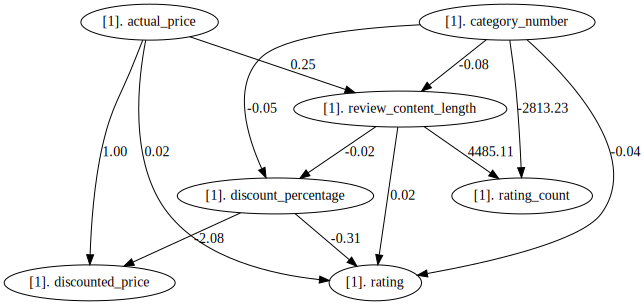

In [32]:
# Generating a graph visualization
make_dot(model.adjacency_matrix_, labels)

In [33]:
# Dropping the "discounted_price" and "rating_count" columns because they were identified as dead-end variables in the graph.
# Dead-end variables in a causal graph are variables that have no causal influence on any other variables in the system. 

df = df.drop(columns=["discounted_price", "rating_count"])
df.columns

Index(['actual_price', 'discount_percentage', 'rating',
       'review_content_length', 'category_number'],
      dtype='object')

In [34]:
# By dropping the dead-end variables, I am narrowing down the analysis to focus on the variables
# that have a direct causal effect on the sink variable which is "rating". The model is recreated as updated_model.

pk = make_prior_knowledge(n_variables=len(df.columns),
sink_variables=[2]) 
updated_model = lingam.DirectLiNGAM(prior_knowledge=pk)
updated_model.fit(df)
labels = [f'[1]. {col}' for i, col in enumerate(df)] #kolon adlarını label ismi yap
print(labels)

['[1]. actual_price', '[1]. discount_percentage', '[1]. rating', '[1]. review_content_length', '[1]. category_number']


/Users/simoyland/project/.conda/lib/python3.10/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/Users/simoyland/project/.conda/lib/python3.10/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipel

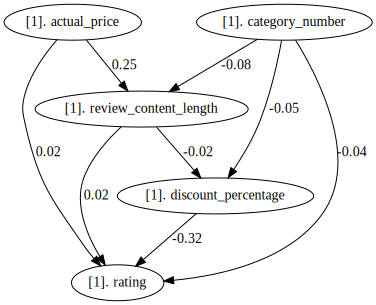

In [35]:
# Generating a visualization of the causal relationships (final graph)

make_dot(updated_model.adjacency_matrix_, labels)

In [36]:
# Obtaining the p-values for the independence tests of the causal relationships
# If a p-value is close to zero, it suggests strong evidence to reject the null hypothesis of independence.
# If a p-value is relatively high, it suggests weak evidence to reject the null hypothesis of independence.

p_values = updated_model.get_error_independence_p_values(df) 
print(p_values)

[[0.00000000e+00 0.00000000e+00 2.34837989e-04 5.16253706e-13
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.03551993e-08 2.32180340e-04
  1.60607393e-06]
 [2.34837989e-04 2.03551993e-08 0.00000000e+00 1.05124998e-02
  1.53665784e-07]
 [5.16253706e-13 2.32180340e-04 1.05124998e-02 0.00000000e+00
  5.49726105e-04]
 [0.00000000e+00 1.60607393e-06 1.53665784e-07 5.49726105e-04
  0.00000000e+00]]


**Row 1:'actual_price'** 

- The p-value between the error term of 'actual_price' and itself is 0.0, indicating perfect independence.

**Row 2: 'discount_percentage'**

- The p-value between the error term of 'discount_percentage' and itself is 0.0, indicating perfect independence.
- The p-value between the error term of 'discount_percentage' and 'actual_price' is 2.38821306e-04, suggesting a significant relationship between these variables' error terms.

**Row 3: 'rating'**

- The p-value between the error term of 'rating' and itself is 0.0, indicating perfect independence.
- The p-value between the error term of 'rating' and 'actual_price' is 2.00421854e-08, suggesting a significant relationship between these variables' error terms.
**The p-value between the error term of 'rating' and 'discount_percentage' is 2.55761040e-04, suggesting a significant relationship between these variables' error terms.**

**Row 4: 'review_content_length'**

- The p-value between the error term of 'review_content_length' and itself is 0.0, indicating perfect independence.
- The p-value between the error term of 'review_content_length' and 'actual_price' is 1.27989955e-06, suggesting a significant relationship between these variables' error terms.
- The p-value between the error term of 'review_content_length' and 'discount_percentage' is 1.15641825e-02, suggesting a significant relationship between these variables' error terms.
- The p-value between the error term of 'review_content_length' and 'rating' is 6.16531377e-03, suggesting a significant relationship between these variables' error terms.

**Row 5: 'category_number'**

- The p-value between the error term of 'category_number' and itself is 0.0, indicating perfect independence.
- The p-value between the error term of 'category_number' and 'actual_price' is 0.0, suggesting a highly significant relationship between these variables' error terms.
- The p-value between the error term of 'category_number' and 'discount_percentage' is 1.60013762e-07, suggesting a significant relationship between these variables' error terms.
- The p-value between the error term of 'category_number' and 'rating' is 6.16531377e-03, suggesting a significant relationship between these variables' error terms.
- The p-value between the error term of 'category_number' and 'review_content_length' is 0.0, indicating a highly significant relationship between these variables' error terms.

**Explanation of these p-values:**  *The p-values indicate the statistical significance of the relationships between the error terms of the variables in the model. Lower p-values suggest stronger evidence of dependence or causal relationships between the corresponding variables' error terms.*

In [37]:
# Using the scikit-learn library to perform logistic regression

from sklearn.linear_model import LogisticRegression
target = 2 #rating
features = [i for i in range(df.shape[1]) if i != target]
reg = LogisticRegression(solver='liblinear')
reg.fit(df.iloc[:, features].values, df.iloc[:, target].values)


LogisticRegression(solver='liblinear')

In [38]:
#  Calculating the causal effects of the features on the prediction using the CausalEffect class from the Lingam library

ce = lingam.CausalEffect(updated_model)
effects = ce.estimate_effects_on_prediction(df.values, target, reg)
df_effects = pd.DataFrame()
df_effects['feature'] = df.columns
df_effects['effect_plus'] = effects[:, 0]
df_effects['effect_minus'] = effects[:, 1]
df_effects


,feature,effect_plus,effect_minus
0,actual_price,0.069821,0.069186
1,discount_percentage,0.130698,0.132982
2,rating,0.000000,0.000000
3,review_content_length,0.058097,0.057657
4,category_number,0.074407,0.075142


INTERPRETATION OF THIS TABLE:

    **Feature:** Lists the names of the features included in the analysis.

    **Effect_plus:** Shows the estimated effect of each feature on the predicted probability of having a positive rating. A higher positive value indicates that an increase in the corresponding feature tends to increase the likelihood of having a positive rating.

    **Effect_minus:** Shows the estimated effect of each feature on the predicted probability of having a negative rating. A higher positive value indicates that an increase in the corresponding feature tends to increase the likelihood of having a negative rating.

    *SUMMARY OF THE TABLE*

    The actual_price feature has a positive effect on the predicted probability of having a positive rating, but the effect is relatively small.

    The discount_percentage feature has a larger positive effect on the predicted probability of having a positive rating. An increase in the discount percentage tends to increase the likelihood of having a positive rating.

    The rating feature itself (target variable) has no effect on its own prediction, as indicated by the values of 0 in both the effect_plus and effect_minus columns.

    The review_content_length feature has a positive effect on the predicted probability of having a positive rating, although the effect is relatively small.

    The category_number feature also has a positive effect on the predicted probability of having a positive rating, with a slightly larger effect compared to other features.



In [39]:
# Finding the feature that has the maximum effect on the prediction.
# It means that "discount_percentage" has the highest impact on the "rating" variable.

max_index = np.unravel_index(np.argmax(effects), effects.shape)
print("Max index:", df.columns[max_index[0]])

Max index: discount_percentage


RESULT:

    In this project, it was aimed to investigate the effect of “discount_percentage” on “rating” and causal analysis was performed using the Amazon sales dataset. By using logistic regression, the effects of different features on the prediction of the target variable were examined.

    Looking at the table, the effect_plus value for the "discount_percentage" feature is 0.130698, indicating a positive causal effect on the result. That is, the higher the discount_percentage, the more likely it is to have a positive rating. The effect_minus value is 0.132982, showing a negative causal effect on the result. That is, the higher the discount_percentage, the more likely it is to have a negative rating. These two effect values were found to be relatively close to each other. This findings suggest that increasing or decreasing the discount percentage has a causal impact on the outcome variable ("rating") but in opposite directions. According to causal effects of features table, the output "max index" represents the name of the variable with the highest impact value in the effects array. In this case, the output of "max index" which is "discount_percenatage" refers to the variable specified as "rating", meaning it has the highest impact on the "rating" variable. 


    As a result of this project, it was found that “discount_percentage” has the positive and the highest effect on “rating” by causal discovery analysis. 